In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
mnist = tf.keras.datasets.mnist

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

11501568/11490434 [==============================] - 18s 2us/step


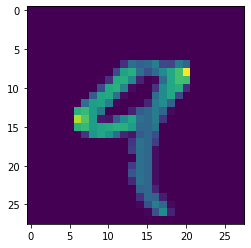

In [21]:
plt.imshow(X_train[4])
plt.show()

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 48s 24ms/step - loss: 0.1965 - accuracy: 0.9428
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0670 - accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0440 - accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0218 - accuracy: 0.9928


In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

313/313 [==============================] - 3s 7ms/step - loss: 0.0611 - accuracy: 0.9826
Validation accuracy:  0.9825999736785889
Validation loss:  0.06110292300581932


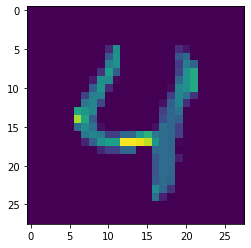

In [20]:
plt.imshow(X_test[4])
plt.show()

In [16]:
prediction = model.predict([X_test])

In [17]:
print("Predicted number is:", np.argmax(prediction[4]))

Predicted number is: 4
